In [95]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy import optimize

import math  
import numpy as np
import pandas as pd

# SIR model

In [125]:
# Total population, N without china
N = 6.4 *(10**9)
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.6, 1/10

In [126]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt


In [127]:
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
# ret = odeint(deriv, y0, [i for i in range(1000)], args=(N, beta, gamma))
ret = odeint(deriv, y0, [i for i in range(1000)], args=(N, beta, gamma))

S, I, R = ret.T


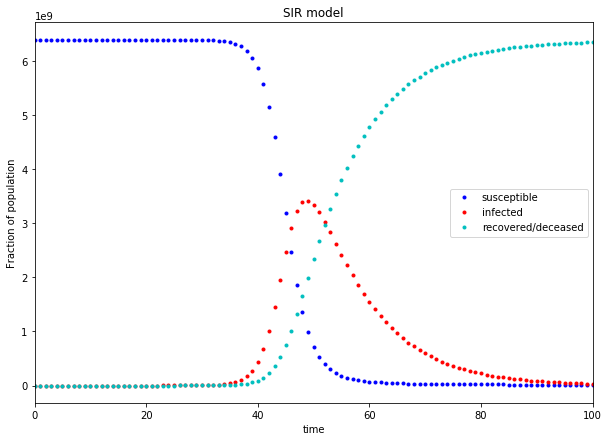

In [128]:
f = plt.figure(figsize=(10,7)) 
plt.plot(S, 'b.', label='susceptible');
plt.plot(I, 'r.', label='infected');
plt.plot(R, 'c.', label='recovered/deceased');
plt.title("SIR model")
plt.xlabel("time", fontsize=10);
plt.ylabel("Fraction of population", fontsize=10);
plt.legend(loc='best')
plt.xlim(0,100)
plt.show()

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [64]:
df = df.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])


In [65]:
df.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [67]:
dates = df.columns[4:]

df = df.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')

In [70]:
df['Date'] =pd.to_datetime(df.Date)


In [71]:
df = df[df['Country/Region'] != 'China']
df.head()

,Country/Region,Lat,Long,Date,Confirmed
0,Afghanistan,33.0000,65.0000,2020-01-23,0
1,Albania,41.1533,20.1683,2020-01-23,0
2,Algeria,28.0339,1.6596,2020-01-23,0
3,Andorra,42.5063,1.5218,2020-01-23,0
4,Angola,-11.2027,17.8739,2020-01-23,0


In [79]:
df = df.groupby('Date')['Confirmed'].sum().reset_index()

In [93]:
df['Day num'] = np.arange(1, len(df)+1)
df.head()

,Date,Confirmed,Day num
0,2020-01-23,11,1
1,2020-01-24,21,2
2,2020-01-25,28,3
3,2020-01-26,43,4
4,2020-01-27,50,5


In [84]:
y = df['Confirmed'].values
x = df['Day num'].values

N = 6.4 *(10**9)
I0, R0 = y[0], 0
S0 = N - I0 - R0

In [110]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * y[0] * y[1] / N
    dIdt = beta * y[0] * y[1] / N - gamma * y[1]
    dRdt = gamma * y[1]
    return dSdt, dIdt, dRdt


In [116]:
def opt_ode(x, beta, gamma):
    return odeint(deriv, (S0, I0, R0), x, args=(N, beta, gamma))[:,1]



In [117]:
popt, pcov = optimize.curve_fit(opt_ode, x, y)

C:\Users\sahaav\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sahaav\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\sahaav\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """


In [140]:
# pcov

In [119]:
fitted = opt_ode(x, *popt)

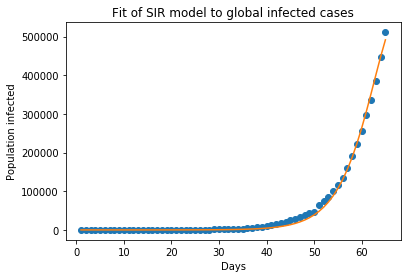

Optimal parameters: beta = 16.145648420992032  and gamma =  15.929329573071737


In [120]:
plt.plot(x, y, 'o')
plt.plot(x, fitted)
plt.title("Fit of SIR model to global infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

In [129]:
beta, gamma = popt[0], popt[1]

In [130]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt


In [134]:
y0 = S0, I0, R0
ret = odeint(deriv, y0, [i for i in range(1000)], args=(N, beta, gamma))

S, I, R = ret.T


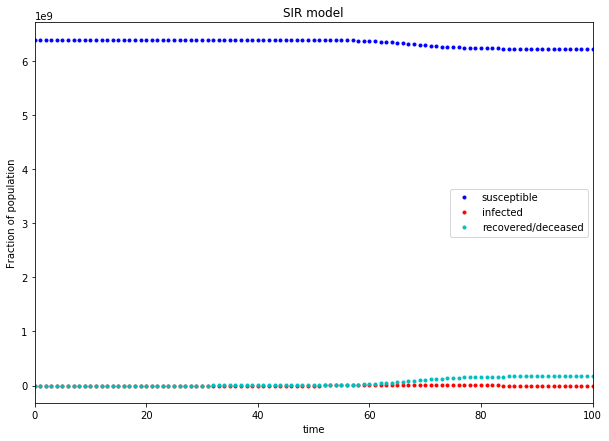

In [138]:
f = plt.figure(figsize=(10,7)) 
plt.plot(S, 'b.', label='susceptible');
plt.plot(I, 'r.', label='infected');
plt.plot(R, 'c.', label='recovered/deceased');
plt.title("SIR model")
plt.xlabel("time", fontsize=10);
plt.ylabel("Fraction of population", fontsize=10);
plt.legend(loc='best')
plt.xlim(0,100)
plt.show()

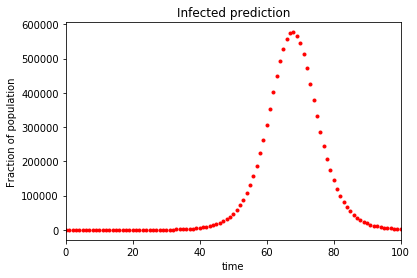

In [147]:
plt.plot(I, 'r.', label='infected');
plt.title("Infected prediction")
plt.xlabel("time");
plt.ylabel("Fraction of population");
plt.xlim(0,100)
plt.show()